In [4]:
import pandas as pd
import altair as alt
import numpy as np
!pip install squarify
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'svg'
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# International migrant stock

In [6]:
# Import table 1 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df1 = pd.read_excel(data, 'Table 1')

# Keep necessary parts and delete unuseful ones
df1 = df1[df1.columns[1:23]].iloc[13:281]
df1 = df1.reindex(df1.index.drop(13))

# Drop Unnamed:2 and Unnamed:4 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)
df1 = df1.reset_index(drop=True)


# Create meaningful column names
df1.columns = ['Country/Location', 'Code',
               'International Migrant Stock at mid-year (Both Sexes)', 
               'International Migrant Stock at mid-year (Both Sexes)',
               'International Migrant Stock at mid-year (Both Sexes)', 
               'International Migrant Stock at mid-year (Both Sexes)',
               'International Migrant Stock at mid-year (Both Sexes)',
               'International Migrant Stock at mid-year (Both Sexes)',
               'International Migrant Stock at mid-year (Male)', 
               'International Migrant Stock at mid-year (Male)',
               'International Migrant Stock at mid-year (Male)',
               'International Migrant Stock at mid-year (Male)',
               'International Migrant Stock at mid-year (Male)',
               'International Migrant Stock at mid-year (Male)',
               'International Migrant Stock at mid-year (Female)',
               'International Migrant Stock at mid-year (Female)',
               'International Migrant Stock at mid-year (Female)',
               'International Migrant Stock at mid-year (Female)',
               'International Migrant Stock at mid-year (Female)',
               'International Migrant Stock at mid-year (Female)']

# replace NaN value with the corresponding column name
df1["Country/Location"] =  df1["Country/Location"].fillna("Country/Location")
df1["Code"] = df1["Code"].fillna("Code")

## Tidy Data by Genders (Both Sexes)

In [7]:

# Create a separate table with necessary information on both sexes
df1_BothSexes = df1[['Country/Location', 'Code','International Migrant Stock at mid-year (Both Sexes)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df1_BothSexes['Gender'] = 'Both'

# Reindex the table by the first row
df1_BothSexes.iloc[0,8] ='Gender'

# First column as the headers
df1_BothSexes.columns = df1_BothSexes.iloc[0]
df1_BothSexes = df1_BothSexes.reindex(df1_BothSexes.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df1_BothSexes.columns = df1_BothSexes.columns.astype(str)
df1_BothSexes.rename(columns = {"2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for both sexes
df1_BothSexes = df1_BothSexes[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df1_BothSexes.set_index(['Gender','Country/Location','Code'], inplace=True)
df1_BothSexes.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df1_BothSexes_long = df1_BothSexes.stack().to_frame()
df1_BothSexes_long.columns = ["International Migrant Stock (Both Sexes)"]

# Remove empty spaces
df1_BothSexes_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df1_BothSexes_long['International Migrant Stock (Both Sexes)']\
= df1_BothSexes_long['International Migrant Stock (Both Sexes)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df1_BothSexes_long = pd.pivot_table(df1_BothSexes_long, 
                                    values='International Migrant Stock (Both Sexes)', 
                                    index=['Country/Location','Code','Mid-year'],
                                    columns = 'Gender')
df1_BothSexes_long

Gender                              Both
Country/Location Code Mid-year          
Afghanistan      4    1990       57686.0
                      1995       71522.0
                      2000       75917.0
                      2005       87300.0
                      2010      102246.0
...                                  ...
Zimbabwe         716  1995      431226.0
                      2000      410041.0
                      2005      392693.0
                      2010      397891.0
                      2015      398866.0

[1575 rows x 1 columns]

## Tidy Data by Genders (Male) 

In [8]:
# Create a separate table with necessary information on Male
df1_Male = df1[['Country/Location', 'Code','International Migrant Stock at mid-year (Male)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df1_Male['Gender'] = 'Male'

# Reindex the table by the first row
df1_Male.iloc[0,8] ='Gender'

# First column as the headers
df1_Male.columns = df1_Male.iloc[0]
df1_Male = df1_Male.reindex(df1_Male.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df1_Male.columns = df1_Male.columns.astype(str)
df1_Male.rename(columns = {"2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Male
df1_Male = df1_Male[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df1_Male.set_index(['Gender','Country/Location','Code'], inplace=True)
df1_Male.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df1_Male_long = df1_Male.stack().to_frame()
df1_Male_long.columns = ["International Migrant Stock (Male)"]

# Remove empty spaces
df1_Male_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df1_Male_long['International Migrant Stock (Male)'] = df1_Male_long['International Migrant Stock (Male)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Male)
df1_Male_long = pd.pivot_table(df1_Male_long, values='International Migrant Stock (Male)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df1_Male_long



Gender                              Male
Country/Location Code Mid-year          
Afghanistan      4    1990       32558.0
                      1995       39105.0
                      2000       42848.0
                      2005       49274.0
                      2010       57709.0
...                                  ...
Zimbabwe         716  1995      246012.0
                      2000      233843.0
                      2005      223970.0
                      2010      226967.0
                      2015      227379.0

[1575 rows x 1 columns]

## Tidy Data by Genders (Female)

In [9]:
# Create a separate table with necessary information on Female
df1_Female = df1[['Country/Location', 'Code','International Migrant Stock at mid-year (Female)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df1_Female['Gender'] = 'Female'

# Reindex the table by the first row
df1_Female.iloc[0,8] ='Gender'

# First column as the headers
df1_Female.columns = df1_Female.iloc[0]
df1_Female = df1_Female.reindex(df1_Female.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df1_Female.columns = df1_Female.columns.astype(str)
df1_Female.rename(columns = {"2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female
df1_Female = df1_Female[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df1_Female.set_index(['Gender','Country/Location','Code'], inplace=True)
df1_Female.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df1_Female_long = df1_Female.stack().to_frame()
df1_Female_long.columns = ["International Migrant Stock (Female)"]

# Remove empty spaces
df1_Female_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df1_Female_long['International Migrant Stock (Female)'] = df1_Female_long['International Migrant Stock (Female)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Female)
df1_Female_long = pd.pivot_table(df1_Female_long, values='International Migrant Stock (Female)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df1_Female_long

Gender                            Female
Country/Location Code Mid-year          
Afghanistan      4    1990       25128.0
                      1995       32417.0
                      2000       33069.0
                      2005       38026.0
                      2010       44537.0
...                                  ...
Zimbabwe         716  1995      185214.0
                      2000      176198.0
                      2005      168723.0
                      2010      170924.0
                      2015      171487.0

[1575 rows x 1 columns]

## Merging Data by Genders (Table 1)

In [10]:
# Merging three data frames
df1_all = [df1_BothSexes_long,df1_Male_long,df1_Female_long]
df1_merge = pd.concat(df1_all,axis = 1)
df1_merge.columns = ['International Migrant Stock (Both Sexes)',
                     'International Migrant Stock (Male)','International Migrant Stock (Female)']
df1_merge

International Migrant Stock (Both Sexes)  \
Country/Location Code Mid-year                                             
Afghanistan      4    1990                                       57686.0   
                      1995                                       71522.0   
                      2000                                       75917.0   
                      2005                                       87300.0   
                      2010                                      102246.0   
...                                                                  ...   
Zimbabwe         716  1995                                      431226.0   
                      2000                                      410041.0   
                      2005                                      392693.0   
                      2010                                      397891.0   
                      2015                                      398866.0   

                                International Migrant Stock (Male)  \
Country/Location Code Mid-year                                       
Afghanistan      4    1990                                 32558.0   
                      1995                                 39105.0   
                      2000                                 42848.0   
                      2005                                 49274.0   
                      2010                                 57709.0   
...                                                            ...   
Zimbabwe         716  1995                                246012.0   
                      2000                                233843.0   
                      2005                                223970.0   
                      2010                                226967.0   
                      2015                                227379.0   

                                International Migrant Stock (Female)  
Country/Location Code Mid-year                                        
Afghanistan      4    1990                                   25128.0  
                      1995                                   32417.0  
                      2000                                   33069.0  
                      2005                                   38026.0  
                      2010                                   44537.0  
...                                                              ...  
Zimbabwe         716  1995                                  185214.0  
                      2000                                  176198.0  
                      2005                                  168723.0  
                      2010                                  170924.0  
                      2015                                  171487.0  

[1575 rows x 3 columns]

# Total population

In [11]:
# Import table 2 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df2 = pd.read_excel(data, 'Table 2')

# Keep necessary parts and delete unuseful ones
df2 = df2[df2.columns[1:23]].iloc[13:281]
df2 = df2.reindex(df2.index.drop(13))

# Drop Unnamed:2 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df2 = df2.drop(['Unnamed: 2'], axis=1)
df2_index = pd.Series(range(266))
df2 = df2.set_index([df2_index])

# Create meaningful column names
df2.columns = ['Country/Location', 'Code',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands(Both Sexes)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands (Male)',
               'Total Population at mid-year in thousands(Female)',
               'Total Population at mid-year in thousands(Female)',
               'Total Population at mid-year in thousands(Female)',
               'Total Population at mid-year in thousands(Female)',
               'Total Population at mid-year in thousands(Female)',
               'Total Population at mid-year in thousands(Female)']
# replace NaN value with the corresponding column name
df2["Country/Location"] = df2["Country/Location"].fillna("Country/Location")
df2["Code"] = df2["Code"].fillna("Code")

## Tidy Data by Genders (Both Sexes)

In [12]:
# Create a separate table with necessary information on both sexes
df2_BothSexes = df2[['Country/Location', 'Code','Total Population at mid-year in thousands(Both Sexes)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df2_BothSexes['Gender'] = 'Both'

# Reindex the table by the first row
df2_BothSexes.iloc[0,8] ='Gender'

# First column as the headers
df2_BothSexes.columns = df2_BothSexes.iloc[0]
df2_BothSexes = df2_BothSexes.reindex(df2_BothSexes.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df2_BothSexes.columns = df2_BothSexes.columns.astype(str)
df2_BothSexes.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for both sexes
df2_BothSexes = df2_BothSexes[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df2_BothSexes.set_index(['Gender','Country/Location','Code'], inplace=True)
df2_BothSexes.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df2_BothSexes_long = df2_BothSexes.stack().to_frame()
df2_BothSexes_long.columns = ["Total Population at mid-year in thousands(Both Sexes)"]

# Remove empty spaces
df2_BothSexes_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df2_BothSexes_long['Total Population at mid-year in thousands(Both Sexes)'] = df2_BothSexes_long['Total Population at mid-year in thousands(Both Sexes)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df2_BothSexes_long = pd.pivot_table(df2_BothSexes_long, values='Total Population at mid-year in thousands(Both Sexes)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df2_BothSexes_long



Gender                               Both
Country/Location Code Mid-year           
Afghanistan      4    1990      12067.570
                      1995      16772.522
                      2000      19701.940
                      2005      24399.948
                      2010      27962.207
...                                   ...
Zimbabwe         716  1995      11683.136
                      2000      12499.981
                      2005      12984.418
                      2010      13973.897
                      2015      15602.751

[1590 rows x 1 columns]

## Tidy Data by Genders (Male)

In [13]:
# Create a separate table with necessary information on male
df2_Male = df2[['Country/Location', 'Code','Total Population at mid-year in thousands (Male)']]

# Add a new column "Gender" and specify the values to be "Male" for future merging.
df2_Male['Gender'] = 'Male'

# Reindex the table by the first row
df2_Male.iloc[0,8] ='Gender'

# First column as the headers
df2_Male.columns = df2_Male.iloc[0]
df2_Male = df2_Male.reindex(df2_Male.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df2_Male.columns = df2_Male.columns.astype(str)
df2_Male.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for male
df2_Male = df2_Male[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df2_Male.set_index(['Gender','Country/Location','Code'], inplace=True)
df2_Male.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df2_Male_long = df2_Male.stack().to_frame()
df2_Male_long.columns = ["Total Population at mid-year in thousands (Male)"]

# Remove empty spaces
df2_Male_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df2_Male_long['Total Population at mid-year in thousands (Male)'] = df2_Male_long['Total Population at mid-year in thousands (Male)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df2_Male_long = pd.pivot_table(df2_Male_long, values='Total Population at mid-year in thousands (Male)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df2_Male_long

Gender                               Male
Country/Location Code Mid-year           
Afghanistan      4    1990       6179.834
                      1995       8682.442
                      2000      10146.537
                      2005      12616.326
                      2010      14367.633
...                                   ...
Zimbabwe         716  1995       5805.632
                      2000       6219.848
                      2005       6436.238
                      2010       6905.036
                      2015       7687.557

[1398 rows x 1 columns]

## Tidy Data by Genders (Female)

In [14]:
# Create a separate table with necessary information on Female
df2_Female = df2[['Country/Location', 'Code','Total Population at mid-year in thousands(Female)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df2_Female['Gender'] = 'Female'

# Reindex the table by the first row
df2_Female.iloc[0,8] ='Gender'

# First column as the headers
df2_Female.columns = df2_Female.iloc[0]
df2_Female = df2_Female.reindex(df2_Female.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df2_Female.columns = df2_Female.columns.astype(str)
df2_Female.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female
df2_Female = df2_Female[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df2_Female.set_index(['Gender','Country/Location','Code'], inplace=True)
df2_Female.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df2_Female_long = df2_Female.stack().to_frame()
df2_Female_long.columns = ["Total Population at mid-year in thousands(Female)"]

# Remove empty spaces
df2_Female_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df2_Female_long['Total Population at mid-year in thousands(Female)'] = df2_Female_long['Total Population at mid-year in thousands(Female)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Female)
df2_Female_long = pd.pivot_table(df2_Female_long, values='Total Population at mid-year in thousands(Female)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df2_Female_long

Gender                             Female
Country/Location Code Mid-year           
Afghanistan      4    1990       5887.736
                      1995       8090.080
                      2000       9555.403
                      2005      11783.622
                      2010      13594.574
...                                   ...
Zimbabwe         716  1995       5877.504
                      2000       6280.133
                      2005       6548.180
                      2010       7068.861
                      2015       7915.194

[1398 rows x 1 columns]

## Merging Data by Genders (Table 2)

In [15]:
# Merging three data frames
df2_all = [df2_BothSexes_long,df2_Male_long,df2_Female_long]
df2_merge = pd.concat(df2_all,axis = 1)
df2_merge.columns = ['Total Population in thousands(Both Sexes)',
                     'Total Population in thousands(Male)','Total Population in thousands(Female)']
df2_merge

Total Population in thousands(Both Sexes)  \
Country/Location Code Mid-year                                              
Afghanistan      4    1990                                      12067.570   
                      1995                                      16772.522   
                      2000                                      19701.940   
                      2005                                      24399.948   
                      2010                                      27962.207   
...                                                                   ...   
Zimbabwe         716  1995                                      11683.136   
                      2000                                      12499.981   
                      2005                                      12984.418   
                      2010                                      13973.897   
                      2015                                      15602.751   

                                Total Population in thousands(Male)  \
Country/Location Code Mid-year                                        
Afghanistan      4    1990                                 6179.834   
                      1995                                 8682.442   
                      2000                                10146.537   
                      2005                                12616.326   
                      2010                                14367.633   
...                                                             ...   
Zimbabwe         716  1995                                 5805.632   
                      2000                                 6219.848   
                      2005                                 6436.238   
                      2010                                 6905.036   
                      2015                                 7687.557   

                                Total Population in thousands(Female)  
Country/Location Code Mid-year                                         
Afghanistan      4    1990                                   5887.736  
                      1995                                   8090.080  
                      2000                                   9555.403  
                      2005                                  11783.622  
                      2010                                  13594.574  
...                                                               ...  
Zimbabwe         716  1995                                   5877.504  
                      2000                                   6280.133  
                      2005                                   6548.180  
                      2010                                   7068.861  
                      2015                                   7915.194  

[1590 rows x 3 columns]

## Combine Data 

In [16]:
# Merge the first two tables 
df_12 = [df1_merge, df2_merge]
UN_MigrantStockTotal_2015 = pd.concat(df_12, axis =1)
UN_MigrantStockTotal_2015 

International Migrant Stock (Both Sexes)  \
Country/Location Code Mid-year                                             
Afghanistan      4    1990                                       57686.0   
                      1995                                       71522.0   
                      2000                                       75917.0   
                      2005                                       87300.0   
                      2010                                      102246.0   
...                                                                  ...   
Zimbabwe         716  1995                                      431226.0   
                      2000                                      410041.0   
                      2005                                      392693.0   
                      2010                                      397891.0   
                      2015                                      398866.0   

                                International Migrant Stock (Male)  \
Country/Location Code Mid-year                                       
Afghanistan      4    1990                                 32558.0   
                      1995                                 39105.0   
                      2000                                 42848.0   
                      2005                                 49274.0   
                      2010                                 57709.0   
...                                                            ...   
Zimbabwe         716  1995                                246012.0   
                      2000                                233843.0   
                      2005                                223970.0   
                      2010                                226967.0   
                      2015                                227379.0   

                                International Migrant Stock (Female)  \
Country/Location Code Mid-year                                         
Afghanistan      4    1990                                   25128.0   
                      1995                                   32417.0   
                      2000                                   33069.0   
                      2005                                   38026.0   
                      2010                                   44537.0   
...                                                              ...   
Zimbabwe         716  1995                                  185214.0   
                      2000                                  176198.0   
                      2005                                  168723.0   
                      2010                                  170924.0   
                      2015                                  171487.0   

                                Total Population in thousands(Both Sexes)  \
Country/Location Code Mid-year                                              
Afghanistan      4    1990                                      12067.570   
                      1995                                      16772.522   
                      2000                                      19701.940   
                      2005                                      24399.948   
                      2010                                      27962.207   
...                                                                   ...   
Zimbabwe         716  1995                                      11683.136   
                      2000                                      12499.981   
                      2005                                      12984.418   
                      2010                                      13973.897   
                      2015                                      15602.751   

                                Total Population in thousands(Male)  \
Country/Location Code Mid-year                                        
Afghanistan      4    1990                         

# International migrant stock as a percentage of the total population

In [17]:
# Import table 3 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df3 = pd.read_excel(data, 'Table 3')

# Keep necessary parts and delete unuseful ones
df3 = df3[df3.columns[1:23]].iloc[13:281]
df3 = df3.reindex(df3.index.drop(13))

# Drop Unnamed:2 and Unnamed:4 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df3 = df3.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)
df3_index = pd.Series(range(266))
df3 = df3.set_index([df3_index])

# Create meaningful column names
df3.columns = ['Country/Location', 'Code',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Box Sexes)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Male)',
               'International Migrant Stock as a percentage of the total population (Female)',
               'International Migrant Stock as a percentage of the total population (Female)',
               'International Migrant Stock as a percentage of the total population (Female)',
               'International Migrant Stock as a percentage of the total population (Female)',
               'International Migrant Stock as a percentage of the total population (Female)',
               'International Migrant Stock as a percentage of the total population (Female)']
# replace NaN value with the corresponding column name
df3["Country/Location"] = df3["Country/Location"].fillna("Country/Location")
df3["Code"] = df3["Code"].fillna("Code")

## Tidy Data by Genders (Both Sexes)

In [18]:
# Create a separate table with necessary information on both sexes
df3_BothSexes = df3[['Country/Location', 'Code','International Migrant Stock as a percentage of the total population (Box Sexes)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df3_BothSexes['Gender'] = 'Both'

# Reindex the table by the first row
df3_BothSexes.iloc[0,8] ='Gender'

# First column as the headers
df3_BothSexes.columns = df3_BothSexes.iloc[0]
df3_BothSexes = df3_BothSexes.reindex(df3_BothSexes.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df3_BothSexes.columns = df3_BothSexes.columns.astype(str)
df3_BothSexes.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for both sexes
df3_BothSexes = df3_BothSexes[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df3_BothSexes.set_index(['Gender','Country/Location','Code'], inplace=True)
df3_BothSexes.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df3_BothSexes_long = df3_BothSexes.stack().to_frame()
df3_BothSexes_long.columns = ["International Migrant Stock as a percentage of the total population (Box Sexes)"]

# Remove empty spaces
df3_BothSexes_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df3_BothSexes_long['International Migrant Stock as a percentage of the total population (Box Sexes)'] = df3_BothSexes_long['International Migrant Stock as a percentage of the total population (Box Sexes)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df3_BothSexes_long = pd.pivot_table(df3_BothSexes_long, values='International Migrant Stock as a percentage of the total population (Box Sexes)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df3_BothSexes_long=df3_BothSexes_long.round(decimals = 3)
df3_BothSexes_long

Gender                           Both
Country/Location Code Mid-year       
Afghanistan      4    1990      0.478
                      1995      0.426
                      2000      0.385
                      2005      0.358
                      2010      0.366
...                               ...
Zimbabwe         716  1995      3.691
                      2000      3.280
                      2005      3.024
                      2010      2.847
                      2015      2.556

[1571 rows x 1 columns]

## Tidy Data by Genders (Male)

In [19]:
# Create a separate table with necessary information on male
df3_Male = df3[['Country/Location', 'Code','International Migrant Stock as a percentage of the total population (Male)']]

# Add a new column "Gender" and specify the values to be "Male" for future merging.
df3_Male['Gender'] = 'Male'

# Reindex the table by the first row
df3_Male.iloc[0,8] ='Gender'

# First column as the headers
df3_Male.columns = df3_Male.iloc[0]
df3_Male = df3_Male.reindex(df3_Male.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df3_Male.columns = df3_Male.columns.astype(str)
df3_Male.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for male
df3_Male = df3_Male[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df3_Male.set_index(['Gender','Country/Location','Code'], inplace=True)
df3_Male.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df3_Male_long = df3_Male.stack().to_frame()
df3_Male_long.columns = ["International Migrant Stock as a percentage of the total population (Male)"]

# Remove empty spaces
df3_Male_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df3_Male_long['International Migrant Stock as a percentage of the total population (Male)'] = df3_Male_long['International Migrant Stock as a percentage of the total population (Male)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df3_Male_long = pd.pivot_table(df3_Male_long, values='International Migrant Stock as a percentage of the total population (Male)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df3_Male_long=df3_Male_long.round(decimals = 3)
df3_Male_long

Gender                           Male
Country/Location Code Mid-year       
Afghanistan      4    1990      0.527
                      1995      0.450
                      2000      0.422
                      2005      0.391
                      2010      0.402
...                               ...
Zimbabwe         716  1995      4.237
                      2000      3.760
                      2005      3.480
                      2010      3.287
                      2015      2.958

[1386 rows x 1 columns]

## Tidy Data by Genders (Female)

In [20]:
# Create a separate table with necessary information on Female
df3_Female = df3[['Country/Location', 'Code','International Migrant Stock as a percentage of the total population (Female)']]

# Add a new column "Gender" and specify the values to be "Female" for future merging.
df3_Female['Gender'] = 'Female'

# Reindex the table by the first row
df3_Female.iloc[0,8] ='Gender'

# First column as the headers
df3_Female.columns = df3_Female.iloc[0]
df3_Female = df3_Female.reindex(df3_Female.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df3_Female.columns = df3_Female.columns.astype(str)
df3_Female.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female
df3_Female = df3_Female[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df3_Female.set_index(['Gender','Country/Location','Code'], inplace=True)
df3_Female.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df3_Female_long = df3_Female.stack().to_frame()
df3_Female_long.columns = ["International Migrant Stock as a percentage of the total population (Female)"]

# Remove empty spaces
df3_Female_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df3_Female_long['International Migrant Stock as a percentage of the total population (Female)'] = df3_Female_long['International Migrant Stock as a percentage of the total population (Female)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Female)
df3_Female_long = pd.pivot_table(df3_Female_long, values='International Migrant Stock as a percentage of the total population (Female)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df3_Female_long = df3_Female_long.round(decimals = 3)
df3_Female_long

Gender                          Female
Country/Location Code Mid-year        
Afghanistan      4    1990       0.427
                      1995       0.401
                      2000       0.346
                      2005       0.323
                      2010       0.328
...                                ...
Zimbabwe         716  1995       3.151
                      2000       2.806
                      2005       2.577
                      2010       2.418
                      2015       2.167

[1386 rows x 1 columns]

## Merging Data by Genders (Table 3)

In [21]:
# Merging three data frames
df3_all = [df3_BothSexes_long,df3_Male_long,df3_Female_long]
df3_merge = pd.concat(df3_all,axis = 1)
df3_merge.columns = ['Both Sexes International Migrant Stock as a percentage of the total population (%)',
                     'Male International Migrant Stock as a percentage of the total population (%)','Female International Migrant Stock as a percentage of the total population (%)']
df3_merge

Both Sexes International Migrant Stock as a percentage of the total population (%)  \
Country/Location Code Mid-year                                                                                       
Afghanistan      4    1990                                                  0.478                                    
                      1995                                                  0.426                                    
                      2000                                                  0.385                                    
                      2005                                                  0.358                                    
                      2010                                                  0.366                                    
...                                                                           ...                                    
Zimbabwe         716  1995                                                  3.691                                    
                      2000                                                  3.280                                    
                      2005                                                  3.024                                    
                      2010                                                  2.847                                    
                      2015                                                  2.556                                    

                                Male International Migrant Stock as a percentage of the total population (%)  \
Country/Location Code Mid-year                                                                                 
Afghanistan      4    1990                                                  0.527                              
                      1995                                                  0.450                              
                      2000                                                  0.422                              
                      2005                                                  0.391                              
                      2010                                                  0.402                              
...                                                                           ...                              
Zimbabwe         716  1995                                                  4.237                              
                      2000                                                  3.760                              
                      2005                                                  3.480                              
                      2010                                                  3.287                              
                      2015                                                  2.958                              

                                Female International Migrant Stock as a percentage of the total population (%)  
Country/Location Code Mid-year                                                                                  
Afghanistan      4    1990                                                  0.427                               
                      1995                                                  0.401                               
                      2000                                                  0.346                               
                      2005                                                  0.323                               
                      2010                                                  0.328                               
...                                                                           ...                               
Zimbabwe         716  1995                                                  3.151                               
                      2

## Combine Data

In [22]:
# Merge the first three tables 
df_123 = [df1_merge, df2_merge,df3_merge]
UN_MigrantStockTotal_2015 = pd.concat(df_123, axis =1)
UN_MigrantStockTotal_2015 

International Migrant Stock (Both Sexes)  \
Country/Location Code Mid-year                                             
Afghanistan      4    1990                                       57686.0   
                      1995                                       71522.0   
                      2000                                       75917.0   
                      2005                                       87300.0   
                      2010                                      102246.0   
...                                                                  ...   
Zimbabwe         716  1995                                      431226.0   
                      2000                                      410041.0   
                      2005                                      392693.0   
                      2010                                      397891.0   
                      2015                                      398866.0   

                                International Migrant Stock (Male)  \
Country/Location Code Mid-year                                       
Afghanistan      4    1990                                 32558.0   
                      1995                                 39105.0   
                      2000                                 42848.0   
                      2005                                 49274.0   
                      2010                                 57709.0   
...                                                            ...   
Zimbabwe         716  1995                                246012.0   
                      2000                                233843.0   
                      2005                                223970.0   
                      2010                                226967.0   
                      2015                                227379.0   

                                International Migrant Stock (Female)  \
Country/Location Code Mid-year                                         
Afghanistan      4    1990                                   25128.0   
                      1995                                   32417.0   
                      2000                                   33069.0   
                      2005                                   38026.0   
                      2010                                   44537.0   
...                                                              ...   
Zimbabwe         716  1995                                  185214.0   
                      2000                                  176198.0   
                      2005                                  168723.0   
                      2010                                  170924.0   
                      2015                                  171487.0   

                                Total Population in thousands(Both Sexes)  \
Country/Location Code Mid-year                                              
Afghanistan      4    1990                                      12067.570   
                      1995                                      16772.522   
                      2000                                      19701.940   
                      2005                                      24399.948   
                      2010                                      27962.207   
...                                                                   ...   
Zimbabwe         716  1995                                      11683.136   
                      2000                                      12499.981   
                      2005                                      12984.418   
                      2010                                      13973.897   
                      2015                                      15602.751   

                                Total Population in thousands(Male)  \
Country/Location Code Mid-year                                        
Afghanistan      4    1990                         

# Female migrants as percentage

In [23]:
# Import table 4 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df4 = pd.read_excel(data,'Table 4')

# Keep necessary parts and delete unuseful ones
df4 = df4[df4.columns[1:23]].iloc[13:281]
df4 = df4.reindex(df4.index.drop(13))

# Drop Unnamed:2 and Unnamed:4 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df4 = df4.drop(['Unnamed: 2','Unnamed: 4'],axis=1)
df4_index = pd.Series(range(266))
df4= df4.set_index([df4_index])

# Create meaningful column names
df4.columns = ['Country/Location', 'Code',
               'Female Migrants as a percent of the International Migrant Stock',
               'Female Migrants as a percent of the International Migrant Stock',
               'Female Migrants as a percent of the International Migrant Stock',
               'Female Migrants as a percent of the International Migrant Stock',
               'Female Migrants as a percent of the International Migrant Stock',
               'Female Migrants as a percent of the International Migrant Stock']
# replace NaN value with the corresponding column name
df4["Country/Location"] =  df4["Country/Location"].fillna("Country/Location")
df4["Code"] = df4["Code"].fillna("Code")




## Tidy Data by Female Migrants

In [24]:

# Create a separate table with necessary information on both sexes
df4_FemaleMigrants = df4[['Country/Location', 'Code','Female Migrants as a percent of the International Migrant Stock']]

# Add a new column "Gender" and specify the values to be "Female Migrants" for future merging.
df4_FemaleMigrants['Female Migrants'] = 'Female Migrants as a percent of the International Migrant Stock'

# Reindex the table by the first row
df4_FemaleMigrants.iloc[0,8] ='Female Migrants'

# First column as the headers
df4_FemaleMigrants.columns = df4_FemaleMigrants.iloc[0]
df4_FemaleMigrants = df4_FemaleMigrants.reindex(df4_FemaleMigrants.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df4_FemaleMigrants.columns = df4_FemaleMigrants.columns.astype(str)
df4_FemaleMigrants.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female Migrants
df4_FemaleMigrants = df4_FemaleMigrants[['Female Migrants','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df4_FemaleMigrants.set_index(['Female Migrants','Country/Location','Code'], inplace=True)
df4_FemaleMigrants.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df4_FemaleMigrants_long = df4_FemaleMigrants.stack().to_frame()
df4_FemaleMigrants_long.columns = ["Female Migrants as a percent of the International Migrant Stock"]

# Remove empty spaces
df4_FemaleMigrants_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df4_FemaleMigrants_long['Female Migrants as a percent of the International Migrant Stock'] = df4_FemaleMigrants_long['Female Migrants as a percent of the International Migrant Stock'].apply(pd.to_numeric)

# Pivot Female Migrants column of this dataframe (Female Migrants)
df4_FemaleMigrants_long = pd.pivot_table(df4_FemaleMigrants_long, values='Female Migrants as a percent of the International Migrant Stock', index=['Country/Location','Code','Mid-year'],columns = 'Female Migrants')
df4_FemaleMigrants_long=df4_FemaleMigrants_long.round(decimals = 3)
df4_FemaleMigrants_long.columns = ['Female Migrants as a percent of the International Migrant Stock (%)']
df4_FemaleMigrants_long

Female Migrants as a percent of the International Migrant Stock (%)
Country/Location Code Mid-year                                                                     
Afghanistan      4    1990                                                 43.560                  
                      1995                                                 45.325                  
                      2000                                                 43.559                  
                      2005                                                 43.558                  
                      2010                                                 43.559                  
...                                                                           ...                  
Zimbabwe         716  1995                                                 42.951                  
                      2000                                                 42.971                  
                      2005                                                 42.966                  
                      2010                                                 42.957                  
                      2015                                                 42.994                  

[1575 rows x 1 columns]

## Combine Data

In [25]:
# Merge the first four tables 
df_1234 = [df1_merge, df2_merge,df3_merge,df4_FemaleMigrants_long]
UN_MigrantStockTotal_2015 = pd.concat(df_1234, axis =1)
UN_MigrantStockTotal_2015 

International Migrant Stock (Both Sexes)  \
Country/Location Code Mid-year                                             
Afghanistan      4    1990                                       57686.0   
                      1995                                       71522.0   
                      2000                                       75917.0   
                      2005                                       87300.0   
                      2010                                      102246.0   
...                                                                  ...   
Zimbabwe         716  1995                                      431226.0   
                      2000                                      410041.0   
                      2005                                      392693.0   
                      2010                                      397891.0   
                      2015                                      398866.0   

                                International Migrant Stock (Male)  \
Country/Location Code Mid-year                                       
Afghanistan      4    1990                                 32558.0   
                      1995                                 39105.0   
                      2000                                 42848.0   
                      2005                                 49274.0   
                      2010                                 57709.0   
...                                                            ...   
Zimbabwe         716  1995                                246012.0   
                      2000                                233843.0   
                      2005                                223970.0   
                      2010                                226967.0   
                      2015                                227379.0   

                                International Migrant Stock (Female)  \
Country/Location Code Mid-year                                         
Afghanistan      4    1990                                   25128.0   
                      1995                                   32417.0   
                      2000                                   33069.0   
                      2005                                   38026.0   
                      2010                                   44537.0   
...                                                              ...   
Zimbabwe         716  1995                                  185214.0   
                      2000                                  176198.0   
                      2005                                  168723.0   
                      2010                                  170924.0   
                      2015                                  171487.0   

                                Total Population in thousands(Both Sexes)  \
Country/Location Code Mid-year                                              
Afghanistan      4    1990                                      12067.570   
                      1995                                      16772.522   
                      2000                                      19701.940   
                      2005                                      24399.948   
                      2010                                      27962.207   
...                                                                   ...   
Zimbabwe         716  1995                                      11683.136   
                      2000                                      12499.981   
                      2005                                      12984.418   
                      2010                                      13973.897   
                      2015                                      15602.751   

                                Total Population in thousands(Male)  \
Country/Location Code Mid-year                                        
Afghanistan      4    1990                         

# Annual rate of change of the migrant stock

In [26]:
# Import table 5 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df5 = pd.read_excel(data, 'Table 5')

# Keep necessary parts and delete unuseful ones
df5 = df5[df5.columns[1:23]].iloc[13:281]
df5 = df5.reindex(df5.index.drop(13))

# Drop Unnamed:2 and Unnamed:4 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df5 = df5.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)
df5_index = pd.Series(range(266))
df5 = df5.set_index([df3_index])

# Create meaningful column names
df5.columns = ['Country/Location', 'Code',
               'Both Sexes Annual Rate of Change of the Migrant Stock',
               'Both Sexes Annual Rate of Change of the Migrant Stock',
               'Both Sexes Annual Rate of Change of the Migrant Stock',
               'Both Sexes Annual Rate of Change of the Migrant Stock',
               'Both Sexes Annual Rate of Change of the Migrant Stock',
               'Male Annual Rate of Change of the Migrant Stock',
               'Male Annual Rate of Change of the Migrant Stock',
               'Male Annual Rate of Change of the Migrant Stock',
               'Male Annual Rate of Change of the Migrant Stock',
               'Male Annual Rate of Change of the Migrant Stock',
               'Female Annual Rate of Change of the Migrant Stock',
               'Female Annual Rate of Change of the Migrant Stock',
               'Female Annual Rate of Change of the Migrant Stock',
               'Female Annual Rate of Change of the Migrant Stock',
               'Female Annual Rate of Change of the Migrant Stock']

# replace NaN value with the corresponding column name
df5["Country/Location"] = df5["Country/Location"].fillna("Country/Location")
df5["Code"] = df5["Code"].fillna("Code")
df5

,Country/Location,Code,Both Sexes Annual Rate of Change of the Migrant Stock,Both Sexes Annual Rate of Change of the Migrant Stock,Both Sexes Annual Rate of Change of the Migrant Stock,Both Sexes Annual Rate of Change of the Migrant Stock,Both Sexes Annual Rate of Change of the Migrant Stock,Male Annual Rate of Change of the Migrant Stock,Male Annual Rate of Change of the Migrant Stock,Male Annual Rate of Change of the Migrant Stock,Male Annual Rate of Change of the Migrant Stock,Male Annual Rate of Change of the Migrant Stock,Female Annual Rate of Change of the Migrant Stock,Female Annual Rate of Change of the Migrant Stock,Female Annual Rate of Change of the Migrant Stock,Female Annual Rate of Change of the Migrant Stock,Female Annual Rate of Change of the Migrant Stock
0,Country/Location,Code,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,1.051865,1.428058,2.042124,2.95416,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.92808,2.737012,1.867837
2,Developed regions,901,2.275847,2.264965,2.50708,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.65595,1.241097
3,Developing regions,902,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.45298,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.89236,2.881555,2.933003
4,Least developed countries,941,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.57011,3.72079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Samoa,882,6.704748,4.90282,-0.858442,-2.299179,-0.768177,6.499035,4.704571,-1.066301,-2.50417,-0.987758,6.931983,5.117229,-0.638315,-2.08663,-0.545343
262,Tokelau,772,-0.298513,-0.303036,-0.307698,10.169947,2.536144,-0.404054,-0.412386,-1.589283,8.750541,2.463246,-0.167365,-0.168777,1.152582,11.577161,2.60325
263,Tonga,776,2.350316,2.359733,3.096969,3.099614,2.641235,2.874558,2.848819,3.228155,3.163851,2.737439,1.787022,1.80546,2.943277,3.023552,2.526318
264,Tuvalu,798,-3.797947,-3.845134,-3.408224,-3.450671,-1.763854,-3.914892,-4.028435,-3.613401,-3.449385,-1.718849,-3.646431,-3.611679,-3.152579,-3.452255,-1.819436


## Tidy Data by Genders (Both Sexes)

In [27]:
# Create a separate table with necessary information on both sexes
df5_BothSexes = df5[['Country/Location', 'Code','Both Sexes Annual Rate of Change of the Migrant Stock']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df5_BothSexes['Gender'] = 'Both Sexes'

# Reindex the table by the first row
df5_BothSexes.iloc[0,7] ='Gender'

# First column as the headers
df5_BothSexes.columns = df5_BothSexes.iloc[0]
df5_BothSexes = df5_BothSexes.reindex(df5_BothSexes.index.drop(0))


# Reorder the headers in order to show that this table is for both sexes
df5_BothSexes = df5_BothSexes[['Gender','Country/Location','Code','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]

# Set index
df5_BothSexes.set_index(['Gender','Country/Location','Code'], inplace=True)
df5_BothSexes.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df5_BothSexes_long = df5_BothSexes.stack().to_frame()
df5_BothSexes_long.columns = ["Both Sexes Annual Rate of Change of the Migrant Stock"]

# Remove empty spaces
df5_BothSexes_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df5_BothSexes_long['Both Sexes Annual Rate of Change of the Migrant Stock'] = df5_BothSexes_long['Both Sexes Annual Rate of Change of the Migrant Stock'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df5_BothSexes_long = pd.pivot_table(df5_BothSexes_long, values='Both Sexes Annual Rate of Change of the Migrant Stock', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df5_BothSexes_long=df5_BothSexes_long.round(decimals = 3)
df5_BothSexes_long

Gender                           Both Sexes
Country/Location Code Mid-year             
Afghanistan      4    1990-1995       4.300
                      1995-2000       1.193
                      2000-2005       2.794
                      2005-2010       3.161
                      2010-2015      26.380
...                                     ...
Zimbabwe         716  1990-1995      -7.481
                      1995-2000      -1.008
                      2000-2005      -0.865
                      2005-2010       0.263
                      2010-2015       0.049

[1310 rows x 1 columns]

## Tidy Data by Genders (Male)

In [28]:
# Create a separate table with necessary information on both sexes
df5_Male = df5[['Country/Location', 'Code','Male Annual Rate of Change of the Migrant Stock']]

# Add a new column "Gender" and specify the values to be "Male" for future merging.
df5_Male['Gender'] = 'Male'

# Reindex the table by the first row
df5_Male.iloc[0,7] ='Gender'

# First column as the headers
df5_Male.columns = df5_Male.iloc[0]
df5_Male = df5_Male.reindex(df5_Male.index.drop(0))


# Reorder the headers in order to show that this table is for Male
df5_Male = df5_Male[['Gender','Country/Location','Code','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]

# Set index
df5_Male.set_index(['Gender','Country/Location','Code'], inplace=True)
df5_Male.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df5_Male_long = df5_Male.stack().to_frame()
df5_Male_long.columns = ["Male Annual Rate of Change of the Migrant Stock"]

# Remove empty spaces
df5_Male_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df5_Male_long['Male Annual Rate of Change of the Migrant Stock'] = df5_Male_long['Male Annual Rate of Change of the Migrant Stock'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Male)
df5_Male_long = pd.pivot_table(df5_Male_long, values='Male Annual Rate of Change of the Migrant Stock', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df5_Male_long=df5_Male_long.round(decimals = 3)
df5_Male_long

Gender                             Male
Country/Location Code Mid-year         
Afghanistan      4    1990-1995   3.665
                      1995-2000   1.828
                      2000-2005   2.795
                      2005-2010   3.160
                      2010-2015  24.192
...                                 ...
Zimbabwe         716  1990-1995  -7.167
                      1995-2000  -1.015
                      2000-2005  -0.863
                      2005-2010   0.266
                      2010-2015   0.036

[1310 rows x 1 columns]

## Tidy Data by Genders (Female)

In [29]:
# Create a separate table with necessary information on both sexes
df5_Female = df5[['Country/Location', 'Code','Female Annual Rate of Change of the Migrant Stock']]

# Add a new column "Gender" and specify the values to be "Male" for future merging.
df5_Female['Gender'] = 'Male'

# Reindex the table by the first row
df5_Female.iloc[0,7] ='Gender'

# First column as the headers
df5_Female.columns = df5_Female.iloc[0]
df5_Female = df5_Female.reindex(df5_Female.index.drop(0))


# Reorder the headers in order to show that this table is for Male
df5_Female = df5_Female[['Gender','Country/Location','Code','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]

# Set index
df5_Female.set_index(['Gender','Country/Location','Code'], inplace=True)
df5_Female.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df5_Female_long = df5_Female.stack().to_frame()
df5_Female_long.columns = ["Female Annual Rate of Change of the Migrant Stock"]

# Remove empty spaces
df5_Female_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df5_Female_long['Female Annual Rate of Change of the Migrant Stock'] = df5_Female_long['Female Annual Rate of Change of the Migrant Stock'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Male)
df5_Female_long = pd.pivot_table(df5_Female_long, values='Female Annual Rate of Change of the Migrant Stock', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df5_Female_long=df5_Female_long.round(decimals = 3)
df5_Female_long

Gender                             Male
Country/Location Code Mid-year         
Afghanistan      4    1990-1995   5.094
                      1995-2000   0.398
                      2000-2005   2.793
                      2005-2010   3.161
                      2010-2015  28.900
...                                 ...
Zimbabwe         716  1990-1995  -7.890
                      1995-2000  -0.998
                      2000-2005  -0.867
                      2005-2010   0.259
                      2010-2015   0.066

[1310 rows x 1 columns]

## Merging Data by Genders (Table 5)

In [30]:
# Merging three data frames
df5_all = [df5_BothSexes_long,df5_Male_long,df5_Female_long]
df5_merge = pd.concat(df5_all,axis = 1)
df5_merge.columns = ['Both Sexes Annual Rate of Change of the Migrant Stock (%)',
                     'Male Annual Rate of Change of the Migrant Stock (%)','Female Annual Rate of Change of the Migrant Stock (%)']
df5_merge

Both Sexes Annual Rate of Change of the Migrant Stock (%)  \
Country/Location Code Mid-year                                                               
Afghanistan      4    1990-1995                                              4.300           
                      1995-2000                                              1.193           
                      2000-2005                                              2.794           
                      2005-2010                                              3.161           
                      2010-2015                                             26.380           
...                                                                            ...           
Zimbabwe         716  1990-1995                                             -7.481           
                      1995-2000                                             -1.008           
                      2000-2005                                             -0.865           
                      2005-2010                                              0.263           
                      2010-2015                                              0.049           

                                 Male Annual Rate of Change of the Migrant Stock (%)  \
Country/Location Code Mid-year                                                         
Afghanistan      4    1990-1995                                              3.665     
                      1995-2000                                              1.828     
                      2000-2005                                              2.795     
                      2005-2010                                              3.160     
                      2010-2015                                             24.192     
...                                                                            ...     
Zimbabwe         716  1990-1995                                             -7.167     
                      1995-2000                                             -1.015     
                      2000-2005                                             -0.863     
                      2005-2010                                              0.266     
                      2010-2015                                              0.036     

                                 Female Annual Rate of Change of the Migrant Stock (%)  
Country/Location Code Mid-year                                                          
Afghanistan      4    1990-1995                                              5.094      
                      1995-2000                                              0.398      
                      2000-2005                                              2.793      
                      2005-2010                                              3.161      
                      2010-2015                                             28.900      
...                                                                            ...      
Zimbabwe         716  1990-1995                                             -7.890      
                      1995-2000                                             -0.998      
                      2000-2005                                             -0.867      
                      2005-2010                                              0.259      
                      2010-2015                                              0.066      

[1310 rows x 3 columns]

# Estimated refugee stock

In [31]:
# Import table 6 from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
df6 = pd.read_excel(data, 'Table 6')

# Keep necessary parts and delete unuseful ones
df6 = df6[df6.columns[1:23]].iloc[13:281]
df6 = df6.reindex(df6.index.drop(13))

# Drop Unnamed:2 and Unnamed:4 (Both contain many NaN values)
# We delete 14 indices, so we maintain 266 indices
df6 = df6.drop(['Unnamed: 2', 'Unnamed: 4'], axis=1)
df6_index = pd.Series(range(266))
df6 = df6.set_index([df6_index])

# Create meaningful column names
df6.columns = ['Country/Location', 'Code',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Estimated Refugees stock at mid-year (Both Sexes)',
               'Refugees as a percentage of the international migrant stock',
               'Refugees as a percentage of the international migrant stock',
               'Refugees as a percentage of the international migrant stock',
               'Refugees as a percentage of the international migrant stock',
               'Refugees as a percentage of the international migrant stock',
               'Refugees as a percentage of the international migrant stock',
               'Annual Rate of Change of the refugee stock',
               'Annual Rate of Change of the refugee stock',
               'Annual Rate of Change of the refugee stock',
               'Annual Rate of Change of the refugee stock',
               'Annual Rate of Change of the refugee stock']
# replace NaN value with the corresponding column name
df6["Country/Location"] = df6["Country/Location"].fillna("Country/Location")
df6["Code"] = df6["Code"].fillna("Code")
df6

,Country/Location,Code,Estimated Refugees stock at mid-year (Both Sexes),Estimated Refugees stock at mid-year (Both Sexes),Estimated Refugees stock at mid-year (Both Sexes),Estimated Refugees stock at mid-year (Both Sexes),Estimated Refugees stock at mid-year (Both Sexes),Estimated Refugees stock at mid-year (Both Sexes),Refugees as a percentage of the international migrant stock,Refugees as a percentage of the international migrant stock,Refugees as a percentage of the international migrant stock,Refugees as a percentage of the international migrant stock,Refugees as a percentage of the international migrant stock,Refugees as a percentage of the international migrant stock,Annual Rate of Change of the refugee stock,Annual Rate of Change of the refugee stock,Annual Rate of Change of the refugee stock,Annual Rate of Change of the refugee stock,Annual Rate of Change of the refugee stock
0,Country/Location,Code,1990,1995,2000,2005,2010.0,2015.0,1990,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,WORLD,900,18836571,17853840,15827803,13276733,15370755.0,19577474.0,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
2,Developed regions,901,2014564,3609670,2997256,2361229,2046917.0,1954224.0,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
3,Developing regions,902,16822007,14244170,12830547,10915504,13323838.0,17623250.0,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561,0.285195,2.663652
4,Least developed countries,941,5048391,5160131,3047488,2363782,1957884.0,3443582.0,45.56588,44.041961,30.221557,24.08243,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Samoa,882,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
262,Tokelau,772,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
263,Tonga,776,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..
264,Tuvalu,798,0,0,0,0,0.0,0.0,0,0,0,0,0.000000,0.000000,..,..,..,..,..


## Tidy Data by Genders (Both Sexes)

In [32]:
# Create a separate table with necessary information
df6_BothSexes = df6[['Country/Location', 'Code','Estimated Refugees stock at mid-year (Both Sexes)']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df6_BothSexes['Gender'] = 'Both Sexes'

# Reindex the table by the first row
df6_BothSexes.iloc[0,8] ='Gender'

# First column as the headers
df6_BothSexes.columns = df6_BothSexes.iloc[0]
df6_BothSexes = df6_BothSexes.reindex(df6_BothSexes.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df6_BothSexes.columns = df6_BothSexes.columns.astype(str)
df6_BothSexes.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female
df6_BothSexes = df6_BothSexes[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df6_BothSexes.set_index(['Gender','Country/Location','Code'], inplace=True)
df6_BothSexes.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df6_BothSexes_long = df6_BothSexes.stack().to_frame()
df6_BothSexes_long.columns = ["Estimated Refugees stock at mid-year (Both Sexes)"]

# Remove empty spaces
df6_BothSexes_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df6_BothSexes_long['Estimated Refugees stock at mid-year (Both Sexes)'] = df6_BothSexes_long['Estimated Refugees stock at mid-year (Both Sexes)'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df6_BothSexes_long = pd.pivot_table(df6_BothSexes_long, values='Estimated Refugees stock at mid-year (Both Sexes)', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df6_BothSexes_long

Gender                          Both Sexes
Country/Location Code Mid-year            
Afghanistan      4    1990            25.0
                      1995         19605.0
                      2000             0.0
                      2005            32.0
                      2010          6434.0
...                                    ...
Zimbabwe         716  1995           514.0
                      2000          4127.0
                      2005          4435.0
                      2010          4435.0
                      2015          5397.0

[1579 rows x 1 columns]

## Tidy Data by Refugees as percentages

In [33]:
# Create a separate table with necessary information
df6_Refugees_percentages = df6[['Country/Location', 'Code','Refugees as a percentage of the international migrant stock']]

# Add a new column "Gender" and specify the values to be "Both" for future merging.
df6_Refugees_percentages['Gender'] = 'Both Sexes'

# Reindex the table by the first row
df6_Refugees_percentages.iloc[0,8] ='Gender'

# First column as the headers
df6_Refugees_percentages.columns = df6_Refugees_percentages.iloc[0]
df6_Refugees_percentages = df6_Refugees_percentages.reindex(df6_Refugees_percentages.index.drop(0))

# Change the type to string in order to easily change year to integer form instead of decimal form
df6_Refugees_percentages.columns = df6_Refugees_percentages.columns.astype(str)
df6_Refugees_percentages.rename(columns = {"1995.0":"1995","2000.0":"2000","2005.0":"2005","2010.0":"2010","2015.0":"2015"},inplace = True)

# Reorder the headers in order to show that this table is for Female
df6_Refugees_percentages = df6_Refugees_percentages[['Gender','Country/Location','Code','1990','1995','2000','2005','2010','2015']]

# Set index
df6_Refugees_percentages.set_index(['Gender','Country/Location','Code'], inplace=True)
df6_Refugees_percentages.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df6_Refugees_percentages_long = df6_Refugees_percentages.stack().to_frame()
df6_Refugees_percentages_long.columns = ['Refugees as a percentage of the international migrant stock']

# Remove empty spaces
df6_Refugees_percentages_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df6_Refugees_percentages_long['Refugees as a percentage of the international migrant stock'] = df6_Refugees_percentages_long['Refugees as a percentage of the international migrant stock'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df6_Refugees_percentages_long = pd.pivot_table(df6_Refugees_percentages_long, values='Refugees as a percentage of the international migrant stock', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df6_Refugees_percentages_long = df6_Refugees_percentages_long.round(decimals = 3)
df6_Refugees_percentages_long

Gender                          Both Sexes
Country/Location Code Mid-year            
Afghanistan      4    1990           0.043
                      1995          27.411
                      2000           0.000
                      2005           0.037
                      2010           6.293
...                                    ...
Zimbabwe         716  1995           0.119
                      2000           1.006
                      2005           1.129
                      2010           1.115
                      2015           1.353

[1575 rows x 1 columns]

## Tidy Data by Annual Rate of Change of the Refugee Stock

In [34]:
# Create a separate table with necessary information on both sexes
df6_ROC = df6[['Country/Location', 'Code','Annual Rate of Change of the refugee stock']]

# Add a new column "Gender" and specify the values to be "Male" for future merging.
df6_ROC['Gender'] = 'Both Sexes'

# Reindex the table by the first row
df6_ROC.iloc[0,7] ='Gender'

# First column as the headers
df6_ROC.columns = df6_ROC.iloc[0]
df6_ROC = df6_ROC.reindex(df6_ROC.index.drop(0))


# Reorder the headers in order to show that this table is for Both Sexes
df6_ROC = df6_ROC[['Gender','Country/Location','Code','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']]

# Set index
df6_ROC.set_index(['Gender','Country/Location','Code'], inplace=True)
df6_ROC.columns.names = ['Mid-year']

# Change the dataframe from wide to long format
df6_ROC_long = df6_ROC.stack().to_frame()
df6_ROC_long.columns = ["Annual Rate of Change of the refugee stock"]

# Remove empty spaces
df6_ROC_long.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

# Change "International Migrant Stock" to numeric values
df6_ROC_long['Annual Rate of Change of the refugee stock'] = df6_ROC_long['Annual Rate of Change of the refugee stock'].apply(pd.to_numeric)

# Pivot gender column of this dataframe (Both Sexes)
df6_ROC_long = pd.pivot_table(df6_ROC_long, values='Annual Rate of Change of the refugee stock', index=['Country/Location','Code','Mid-year'],columns = 'Gender')
df6_ROC_long=df6_ROC_long.round(decimals = 3)
df6_ROC_long

Gender                           Both Sexes
Country/Location Code Mid-year             
Afghanistan      4    1990-1995     128.993
                      2005-2010     102.912
                      2010-2015      50.502
Africa           903  1990-1995       0.076
                      1995-2000      -8.003
...                                     ...
Zimbabwe         716  1990-1995    -110.036
                      1995-2000      42.669
                      2000-2005       2.304
                      2005-2010      -0.263
                      2010-2015       3.877

[890 rows x 1 columns]

## Merge Data 

In [35]:
# Merging three data frames
df6_all = [df6_BothSexes_long,df6_Refugees_percentages_long]
df6_merge = pd.concat(df6_all,axis = 1)
df6_merge.columns = ['Estimated Refugees stock at mid-year (Both Sexes)',
                     'Refugees as a percentage of the international migrant stock (%)',]
df6_merge

Estimated Refugees stock at mid-year (Both Sexes)  \
Country/Location Code Mid-year                                                      
Afghanistan      4    1990                                                   25.0   
                      1995                                                19605.0   
                      2000                                                    0.0   
                      2005                                                   32.0   
                      2010                                                 6434.0   
...                                                                           ...   
Zimbabwe         716  1995                                                  514.0   
                      2000                                                 4127.0   
                      2005                                                 4435.0   
                      2010                                                 4435.0   
                      2015                                                 5397.0   

                                Refugees as a percentage of the international migrant stock (%)  
Country/Location Code Mid-year                                                                   
Afghanistan      4    1990                                                  0.043                
                      1995                                                 27.411                
                      2000                                                  0.000                
                      2005                                                  0.037                
                      2010                                                  6.293                
...                                                                           ...                
Zimbabwe         716  1995                                                  0.119                
                      2000                                                  1.006                
                      2005                                                  1.129                
                      2010                                                  1.115                
                      2015                                                  1.353                

[1579 rows x 2 columns]

# Summary Data

In [36]:
# Merge the first five tables 
df_all = [df1_merge, df2_merge,df3_merge,df4_FemaleMigrants_long,df6_merge]
UN_MigrantStockTotal_2015 = pd.concat(df_all, axis =1)

# UN_MigrantStockTotal_2015 = UN_MigrantStockTotal_2015.fillna("*")
UN_MigrantStockTotal_2015 

International Migrant Stock (Both Sexes)  \
Country/Location Code Mid-year                                             
Afghanistan      4    1990                                       57686.0   
                      1995                                       71522.0   
                      2000                                       75917.0   
                      2005                                       87300.0   
                      2010                                      102246.0   
...                                                                  ...   
Zimbabwe         716  1995                                      431226.0   
                      2000                                      410041.0   
                      2005                                      392693.0   
                      2010                                      397891.0   
                      2015                                      398866.0   

                                International Migrant Stock (Male)  \
Country/Location Code Mid-year                                       
Afghanistan      4    1990                                 32558.0   
                      1995                                 39105.0   
                      2000                                 42848.0   
                      2005                                 49274.0   
                      2010                                 57709.0   
...                                                            ...   
Zimbabwe         716  1995                                246012.0   
                      2000                                233843.0   
                      2005                                223970.0   
                      2010                                226967.0   
                      2015                                227379.0   

                                International Migrant Stock (Female)  \
Country/Location Code Mid-year                                         
Afghanistan      4    1990                                   25128.0   
                      1995                                   32417.0   
                      2000                                   33069.0   
                      2005                                   38026.0   
                      2010                                   44537.0   
...                                                              ...   
Zimbabwe         716  1995                                  185214.0   
                      2000                                  176198.0   
                      2005                                  168723.0   
                      2010                                  170924.0   
                      2015                                  171487.0   

                                Total Population in thousands(Both Sexes)  \
Country/Location Code Mid-year                                              
Afghanistan      4    1990                                      12067.570   
                      1995                                      16772.522   
                      2000                                      19701.940   
                      2005                                      24399.948   
                      2010                                      27962.207   
...                                                                   ...   
Zimbabwe         716  1995                                      11683.136   
                      2000                                      12499.981   
                      2005                                      12984.418   
                      2010                                      13973.897   
                      2015                                      15602.751   

                                Total Population in thousands(Male)  \
Country/Location Code Mid-year                                        
Afghanistan      4    1990                         

In [37]:
ROC_df = pd.concat([df5_merge, df6_ROC_long], axis =1)
ROC_df

Both Sexes Annual Rate of Change of the Migrant Stock (%)  \
Country/Location Code Mid-year                                                               
Afghanistan      4    1990-1995                                              4.300           
                      1995-2000                                              1.193           
                      2000-2005                                              2.794           
                      2005-2010                                              3.161           
                      2010-2015                                             26.380           
...                                                                            ...           
Zimbabwe         716  1990-1995                                             -7.481           
                      1995-2000                                             -1.008           
                      2000-2005                                             -0.865           
                      2005-2010                                              0.263           
                      2010-2015                                              0.049           

                                 Male Annual Rate of Change of the Migrant Stock (%)  \
Country/Location Code Mid-year                                                         
Afghanistan      4    1990-1995                                              3.665     
                      1995-2000                                              1.828     
                      2000-2005                                              2.795     
                      2005-2010                                              3.160     
                      2010-2015                                             24.192     
...                                                                            ...     
Zimbabwe         716  1990-1995                                             -7.167     
                      1995-2000                                             -1.015     
                      2000-2005                                             -0.863     
                      2005-2010                                              0.266     
                      2010-2015                                              0.036     

                                 Female Annual Rate of Change of the Migrant Stock (%)  \
Country/Location Code Mid-year                                                           
Afghanistan      4    1990-1995                                              5.094       
                      1995-2000                                              0.398       
                      2000-2005                                              2.793       
                      2005-2010                                              3.161       
                      2010-2015                                             28.900       
...                                                                            ...       
Zimbabwe         716  1990-1995                                             -7.890       
                      1995-2000                                             -0.998       
                      2000-2005                                             -0.867       
                      2005-2010                                              0.259       
                      2010-2015                                              0.066       

                                 Both Sexes  
Country/Location Code Mid-year               
Afghanistan      4    1990-1995     128.993  
                      1995-2000         NaN  
                      2000-2005         NaN  
                      2005-2010     102.912  
                      2010-2015      50.502  
...                                     ...  
Zimbabwe         716  1990-1995    -110.036  
                      1995-2000      42.669  
                      2000-2005   

In [38]:
# Import table ANNEX from the UN 2015 data
data = pd.ExcelFile('UN_MigrantStockTotal_2015.xlsx')
ANNEX_df = pd.read_excel(data, 'ANNEX')
columns = ANNEX_df.iloc[13,:]
ANNEX_df = ANNEX_df.iloc[14:,:]
ANNEX_df.columns = columns
ANNEX_df = ANNEX_df.reset_index(drop = True)
ANNEX_df

13,Country code,Country or area,Sort order,Major area,Code,Sort order,Region,Code,Sort order,Developed region,Least developed country,Sub-Saharan Africa
0,4,Afghanistan,99,Asia,935,71,Southern Asia,5501,98,No,Yes,No
1,8,Albania,154,Europe,908,127,Southern Europe,925,153,Yes,No,No
2,12,Algeria,40,Africa,903,7,Northern Africa,912,39,No,No,No
3,16,American Samoa,257,Oceania,909,238,Polynesia,957,256,No,No,No
4,20,Andorra,155,Europe,908,127,Southern Europe,925,153,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
227,876,Wallis and Futuna Islands,265,Oceania,909,238,Polynesia,957,256,No,No,No
228,732,Western Sahara,46,Africa,903,7,Northern Africa,912,39,No,No,No
229,887,Yemen,126,Asia,935,71,Western Asia,922,108,No,Yes,No
230,894,Zambia,27,Africa,903,7,Eastern Africa,910,8,No,Yes,Yes


In [39]:
Country_codes = ANNEX_df['Country code'].tolist()
Major_area_codes = list(set(ANNEX_df.iloc[:,4]))
Region_codes = list(set(ANNEX_df.iloc[:,7]))


# Visualization

In [40]:
# Converts the data type of the Mid-year column to an integer
UN_df = UN_MigrantStockTotal_2015.reset_index()
UN_df['Mid-year'] = UN_df['Mid-year'].astype(int)

## figure 1

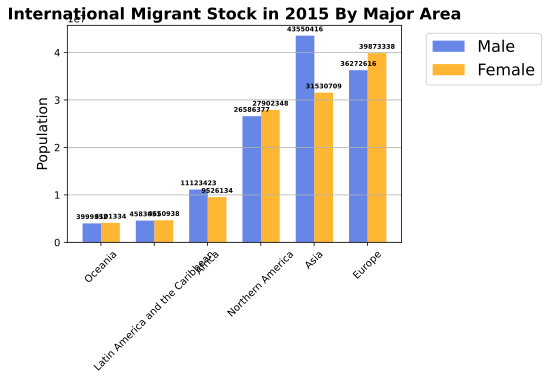

In [41]:
# Select 2015 data for Female Migrants as a percent of the International Migrant Stock
mask = (UN_df['Mid-year'] == 2015) & (UN_df['Code'].isin(Major_area_codes))
temp_df = UN_df[mask]
temp_df = temp_df.sort_values("International Migrant Stock (Both Sexes)")

# Creating appropiate bar width in the chart
bar_width = 0.35
male = temp_df['International Migrant Stock (Male)']
female = temp_df['International Migrant Stock (Female)']
female
Major_area = temp_df['Country/Location']


fig, ax=plt.subplots()


# Creting bar chart by each gender
bar1 = ax.bar(np.arange(6), male, label = 'Male', color = 'royalblue', alpha = 0.8, width = bar_width)
bar2 = ax.bar(np.arange(6)+bar_width, female, label = 'Female', color = 'orange', alpha = 0.8, width = bar_width)

# Set the size of the graph
plt.rcParams["figure.figsize"] = (10,7)
# Create y-axis label
ax.set_ylabel('Population',fontsize=14)
# Create title name
ax.set_title('International Migrant Stock in 2015 By Major Area',fontweight="bold",fontsize = 16)
# Center the tick to the middle
x = np.arange(len(Major_area))+0.17
ax.set_xticks(x)
# Create x-axis label
ax.set_xticklabels(Major_area , rotation = 45) 

# Add value label for each bar
for p in bar1:
   height = int(p.get_height())
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom',fontsize = 6.5,fontweight="bold")  
for p in bar2:
   height = int(p.get_height())
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom',fontsize =6.5,fontweight="bold") 
# Add legend    
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize = 16)

# Add horizontal gridlines
ax.grid(axis='y')
plt.savefig('barchart.png')
plt.show()


## Figure 2

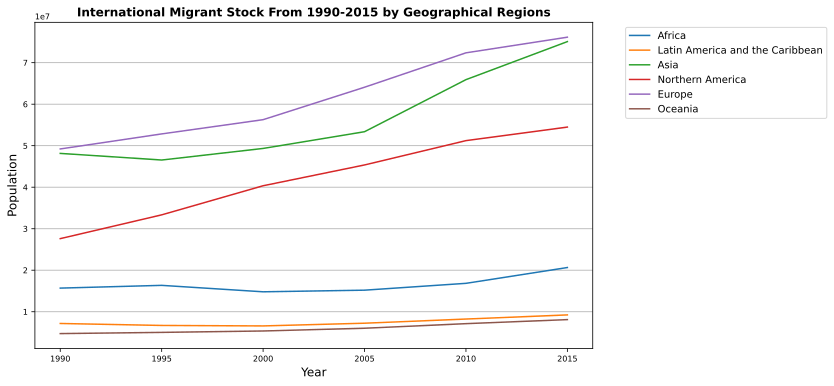

In [51]:
plt.figure(figsize = (10,6))

# Line Graph from 1990 to 2015
for code in Major_area_codes:
    mask = UN_df['Code'] == code
    temp_df = UN_df[mask]
    Location = temp_df['Country/Location'].values[0]
    plt.plot(temp_df['Mid-year'], temp_df['International Migrant Stock (Both Sexes)'], label = Location)

# Add legend on the upper left corner of the graph
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize =10)
# Add axis labels
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Population", fontsize = 12)
# Add label
plt.title("International Migrant Stock From 1990-2015 by Geographical Regions", fontsize = 12,fontweight="bold")
# Add gridlines
plt.grid(axis='y')
plt.show()

## Figure 3

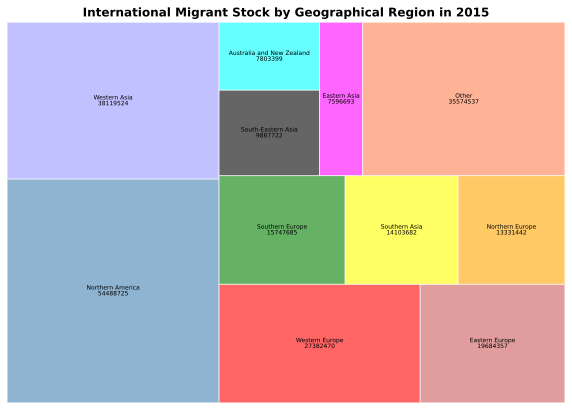

In [61]:
# Select 2005 data for Female Migrants as a percent of the International Migrant Stock
mask = (UN_df['Mid-year'] == 2015) & (UN_df['Code'].isin(Region_codes))
temp_df = UN_df[mask]
temp_df = temp_df.sort_values("International Migrant Stock (Both Sexes)")
Regions = temp_df['Country/Location']
Migrants = temp_df['International Migrant Stock (Both Sexes)'].astype(int)
colors = ['steelblue','#9999ff','red','indianred','green','yellow','orange','black','cyan','magenta','coral']

Migrants.index = Regions
Migrants = Migrants.sort_values(ascending=False)
top10_Migrants = Migrants.iloc[:10]
new_Migrants = top10_Migrants.append(pd.Series([Migrants.iloc[10:].sum()], index = ['Other']))

plt.figure(figsize = (10,7))
plot = squarify.plot(sizes = new_Migrants, 
                     label = new_Migrants.index, 
                     alpha = 0.6, 
                     color = colors, 
                     value = new_Migrants, 
                     edgecolor = 'white', 
                    )
plt.rc('font', size=6)
plt.axis('off')
plt.title("International Migrant Stock by Geographical Region in 2015",fontsize = 12,fontweight="bold")
plt.show()

## Figure 4

In [63]:
# Create a new dictionary to storge the Major_area corresponding to the different country codes
code_Major_area_dict = dict()
for code, Major_area in zip(ANNEX_df['Country code'], ANNEX_df['Major area']):
    code_Major_area_dict[code] = Major_area

# Select 2015 data for Female Migrants as a percent of the International Migrant Stock
mask = (UN_df['Mid-year'] == 2015) & (UN_df['Code'].isin(Country_codes))
temp_df = UN_df[mask][['Code', 'Female Migrants as a percent of the International Migrant Stock (%)']]

# Add a new column with the Major_area for each country
temp_df['Major area'] = temp_df['Code'].map(code_Major_area_dict)

# Remove the missing value sample
temp_df = temp_df.dropna()



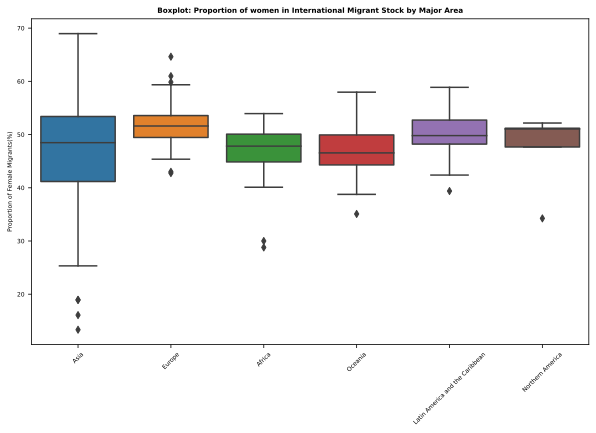

In [73]:
plt.figure(figsize = (10,6))
# Box Plot
sns.boxplot(x = 'Major area', y = 'Female Migrants as a percent of the International Migrant Stock (%)',
           data = temp_df)
# ticks rotation
plt.xticks(rotation = 45)
# Add label
plt.ylabel("Proportion of Female Migrants(%)")
plt.xlabel("")
# Add title
plt.title("Boxplot: Proportion of women in International Migrant Stock by Major Area",fontweight="bold")
# Add legend

plt.show()

## Figure 5

In [46]:
# Add a new column with the Major_area for each country
UN_df['Major area'] = UN_df['Code'].map(code_Major_area_dict)

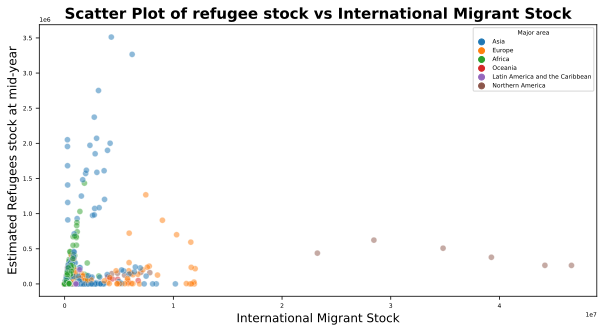

In [68]:
plt.figure(figsize = (10,5))
# Scatterplot 
sns.scatterplot(x = 'International Migrant Stock (Both Sexes)',
               y = 'Estimated Refugees stock at mid-year (Both Sexes)',
                hue = 'Major area',
               data = UN_df, alpha = 0.5)
# Add labels
plt.xlabel("International Migrant Stock",fontsize =12)
plt.ylabel("Estimated Refugees stock at mid-year",fontsize =12)
# Add title
plt.title("Scatter Plot of refugee stock vs International Migrant Stock",fontsize = 15,fontweight="bold" )
plt.show()

## Figure 6

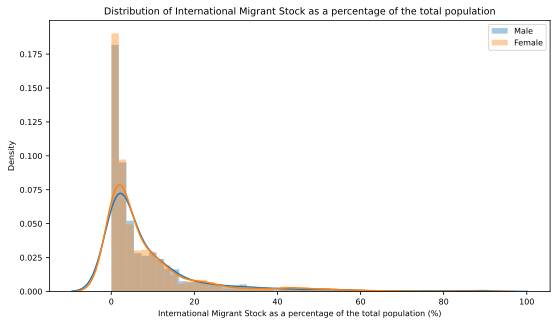

In [48]:
plt.figure(figsize = (9,5))
sns.distplot(UN_df['Male International Migrant Stock as a percentage of the total population (%)'],
            label = 'Male')

sns.distplot(UN_df['Female International Migrant Stock as a percentage of the total population (%)'],
            label = 'Female')
plt.legend()
plt.xlabel("International Migrant Stock as a percentage of the total population (%)")
plt.title("Distribution of International Migrant Stock as a percentage of the total population")
plt.show()